In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as sts
import statsmodels.tsa.arima_model as arima
import pmdarima as pm

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


An autoregressive-moving-average model ARMA(p,q) has p autoregressive terms and q moving-average terms: 
$$Xt=c+\xi_t+\sum_{i=1}^{p}\phi_iX_{t−i}+\sum_{j=1}^{q}\theta_j\xi_{t−j}$$
where $\phi_1,...,\phi_p$ and $\theta_1,...,\theta_q$ are the parameters of the model,c is a constant, and $\xi_t$ is white noise.

In [2]:
def ARMA(phi, theta, c, initial_cond = [0,0], num_samples = 5000):
    white_noise = np.random.random(size=num_samples)
    X = initial_cond
    order = len(phi) if len(phi)>len(theta) else len(theta)
    
    for t in range(order, num_samples):
        ar = sum([phi[i]*X[t-i-1] for i in range(len(phi))])
        ma = sum([theta[j]*white_noise[t-j-1] for j in range(len(theta))])
        X.append(c + white_noise[t] + ar + ma)
    return X    

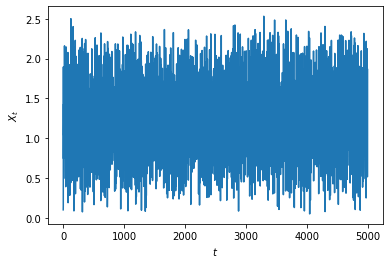

(-26.107010046861102,
 0.0,
 6,
 4993,
 {'1%': -3.431660367533127,
  '5%': -2.862119040575461,
  '10%': -2.5670782240311683},
 1841.1562241920037)

In [12]:
arma_2_2 = ARMA([0.25, -0.45], [0.85, 0.15], 0.5, [0.1, 0.15])
plt.plot(arma_2_2)
plt.ylabel(r'$X_t$')
plt.xlabel(r'$t$')
plt.show()
sts.adfuller(arma_2_2)

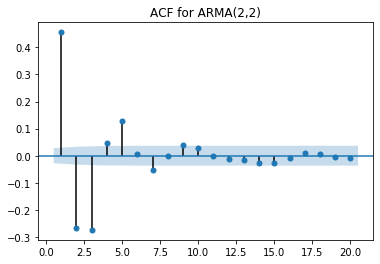

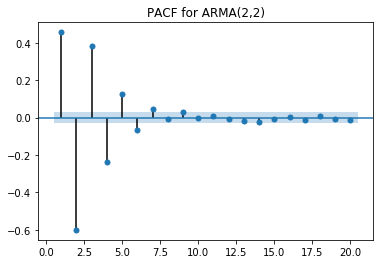

In [13]:
plot_acf(arma_2_2, title = 'ACF for ARMA(2,2)', zero = False, lags = 20);
plot_pacf(arma_2_2, title = 'PACF for ARMA(2,2)',zero = False, lags = 20);

To fit the model to the genereated data, we start by plotting the autocorrelation function and partial autocorrelation function for the data. This gives us information about relationship between $y_t$ and $y_{t_k}$ for different $k$s. PACF gives simillar information, but with effects of lags removed. From these plots we can estimate which $y_t$s are important (in other words - how many we should consider). We usually take into account only first ones. If for example 27th appears to be significant, we usually skip them. 
After the model order is identified, we can search for parameters. For this Log Likelihood method can be used. We try to minimise this for given parameters. Also useful if Akaike's Information Criterion (AIC) given by formula 
$$ AIC = -2log(L) + 2(p+q+k+1)$$
where $L$ is likelihood of data and $k=1$ if $c\neq 0$ and $k=0$ if $c=0$. This criterion, as well as corrected AIC and Bayesian Information Criterion (BIC) can be used to distinguish good, from bad models. A good rule of thumb is: "better models have lower AIC/AICc/BIC". Formulas for AICc and BIC were skipped.

Other approach is to use available library/module. In this case pmdarima was used to determine the order of ARIMA(p,0,q) model. This model (i.e. ARIMA with d=0) is isomorphic to ARMA(p,q) model.

In [14]:
m1 = pm.auto_arima(arma_2_2, error_action='ignore', seasonal = False)
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(2, 2)   Log Likelihood                -919.674
Method:                       css-mle   S.D. of innovations              0.291
Date:                Sun, 17 May 2020   AIC                           1851.349
Time:                        19:36:17   BIC                           1890.452
Sample:                             0   HQIC                          1865.054
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2434      0.007    180.375      0.000       1.230       1.257
ar.L1.y        0.2536      0.030      8.428      0.000       0.195       0.313
ar.L2.y       -0.4501      0.015    -29.632      0.000      -0.480      -0.420
ma.L1.y        0.8391      0.033     25.640      0.000       0.775       0.903
ma.L2.y        0.1667      0.029      5.691      0.000       0.109       0.224
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2817           -1.4637j            1.4906           -0.2197
AR.2            0.2817           +1.4637j            1.4906            0.2197
MA.1           -1.9371           +0.0000j            1.9371            0.5000
MA.2           -3.0974           +0.0000j            3.0974            0.5000
-----------------------------------------------------------------------------
"""

Model is estimated to be of order (2,2)

In [15]:
model_2_2 = arima.ARMA(arma_2_2, order = (2,2)) #ARMA function from statsmodels library
results_2_2 = model_2_2.fit()
results_2_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(2, 2)   Log Likelihood                -919.674
Method:                       css-mle   S.D. of innovations              0.291
Date:                Sun, 17 May 2020   AIC                           1851.349
Time:                        19:36:23   BIC                           1890.452
Sample:                             0   HQIC                          1865.054
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2434      0.007    180.375      0.000       1.230       1.257
ar.L1.y        0.2536      0.030      8.428      0.000       0.195       0.313
ar.L2.y       -0.4501      0.015    -29.632      0.000      -0.480      -0.420
ma.L1.y        0.8391      0.033     25.640      0.000       0.775       0.903
ma.L2.y        0.1667      0.029      5.691      0.000       0.109       0.224
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.2817           -1.4637j            1.4906           -0.2197
AR.2            0.2817           +1.4637j            1.4906            0.2197
MA.1           -1.9371           +0.0000j            1.9371            0.5000
MA.2           -3.0974           +0.0000j            3.0974            0.5000
-----------------------------------------------------------------------------
"""

We see parameters are simillar to those specified above. Below are two more models prepared and tested as before

C:\Users\kagiencz\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(3, 3)   Log Likelihood               -1884.537
Method:                       css-mle   S.D. of innovations              0.353
Date:                Sun, 17 May 2020   AIC                           3785.074
Time:                        19:43:44   BIC                           3837.211
Sample:                             0   HQIC                          3803.347
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0077      0.006    356.641      0.000       1.997       2.019
ar.L1.y        0.1503      0.072      2.090      0.037       0.009       0.291
ar.L2.y       -0.7450      0.029    -25.811      0.0

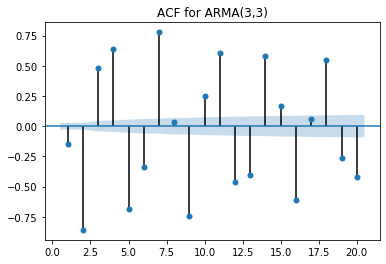

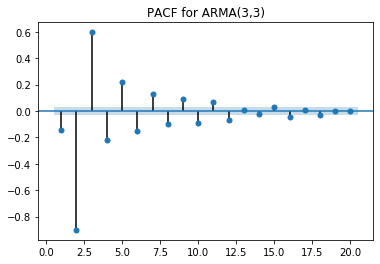

In [20]:
arma_3_3 = ARMA([0.15, -0.75, 0.5], [0.75, -0.45, 0.125], 1.5, [0.4, 0.15, 0.05])
plot_acf(arma_3_3, title = 'ACF for ARMA(3,3)', zero = False, lags = 20);
plot_pacf(arma_3_3, title = 'PACF for ARMA(3,3)',zero = False, lags = 20);
m2 = pm.auto_arima(arma_3_3, error_action='ignore', seasonal = False)
print(m2.summary())
print("--------------------------------")
model_3_3 = arima.ARMA(arma_3_3, order = (3,3)) #ARMA function from statsmodels library
results_3_3 = model_3_3.fit()
print(results_3_3.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 5000
Model:                     ARMA(4, 1)   Log Likelihood                -926.801
Method:                       css-mle   S.D. of innovations              0.291
Date:                Sun, 17 May 2020   AIC                           1867.602
Time:                        19:44:38   BIC                           1913.223
Sample:                             0   HQIC                          1883.592
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0797      0.004    301.737      0.000       1.073       1.087
ar.L1.y        0.1673      0.020      8.443      0.000       0.128       0.206
ar.L2.y       -0.7426      0.011    -69.115      0.0

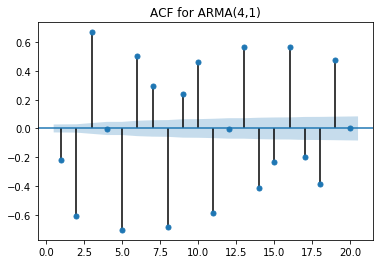

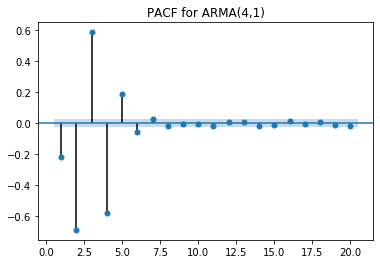

In [21]:
arma_4_1 = ARMA([0.15, -0.75, 0.5, -0.45], [0.33], 1.0, [0.4, 0.05, 0.85, -0.23])
plot_acf(arma_4_1, title = 'ACF for ARMA(4,1)', zero = False, lags = 20);
plot_pacf(arma_4_1, title = 'PACF for ARMA(4,1)',zero = False, lags = 20);
m3 = pm.auto_arima(arma_4_1, error_action='ignore', seasonal = False)
print(m3.summary())
print("--------------------------------")
model_4_1 = arima.ARMA(arma_4_1, order = (4,1)) #ARMA function from statsmodels library
results_4_1 = model_4_1.fit()
print(results_4_1.summary())